In [1]:
import requests
import jieba
from bs4 import BeautifulSoup
import re
import json
import _thread
import time
import jieba.analyse
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:

localUrl = 'https://www.ptt.cc'
headers = {
    'cookie':'over18=1'
}
nameDict = {}
monthDict = {
    'Jan':'01',
    'Feb':'02',
    'Mar':'03',
    'Apr':'04',
    'May':'05',
    'Jun':'06',
    'Jul':'07',
    'Aug':'08',
    'Sep':'09',
    'Oct':'10',
    'Nov':'11',
    'Dec':'12'
}
Ccomponents = [
    '推',
    '噓',
    '→',
    '※',
    '◆'
]

In [4]:
stopWords=[]
with open('stopWord.txt', 'r',encoding='utf-8') as f:
    for data in f.readlines():
        data = data.strip()
        stopWords.append(data)
#     print(stopWords)

In [5]:
def saveDate(ip,name,title,data,time):
    dict = {
        "ip":ip,
        "name":name,
        "title":title,
        "time":time,
        "data":data
        
    }
    return dict

In [6]:
def getPageData(url):
    allData = ''
    res = requests.get(url,headers=headers)
    soup = BeautifulSoup(res.text,'lxml')
    articleTime='noTime'
    articleName='noName'
    article = soup.find('div',{'class':'bbs-screen bbs-content'}).text
#     文章標題url
    articleTitle = url.split('/')[-1].split('.html')[0].lstrip().rstrip()
#     文章時間
    testArticleTime = soup.find_all('div',{'class':re.compile('article-metaline')})
    for t in testArticleTime:
        if '作者' in t.span.text:
            articleName = t.find('span',{'class':'article-meta-value'}).text.lstrip().rstrip()
        elif '時間' in t.span.text:
            articleTime = t.find('span',{'class':'article-meta-value'}).text.lstrip().rstrip()
            articleTime = "{0}/{1}".format(monthDict[articleTime.split(' ')[1]],articleTime.split(' ')[2])
#     主要文章
#     過濾有url的地方
    urlPat =  re.compile(r"(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b")
    article = re.sub(urlPat,'',article)
#     作者文章
    ipPat = re.compile(r"\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b")
    timePat = re.compile(r"(\d{1,2}/\d{1,2})")
    clockPat = re.compile(r"(\d{1,2}:\d{1,2})")
    articleText = ''
    articleIp = 'noIp'
    goPass = False
    for i in article.split('\n'):
        if len(testArticleTime) == 0 :
            goPass = True
            continue 
        if testArticleTime[len(testArticleTime)-1].text in i:
            goPass = True
            continue
        if i[:1] not in Ccomponents:
#             文章
            if goPass:
                if '--' != i:
                    articleText = articleText + ' ' + i
        elif '※' in i[:1] or '◆' in i[:1]:
#             IP
            if re.findall(ipPat, i):
                articleIp = re.findall(ipPat, i)[0].lstrip().rstrip()
    articleText = articleText.lstrip().rstrip()
    allData = articleText
#     儲存主要文章
    name = 'noName'
    data = 'noData'
    ip = 'noIp'
    time = 'noTime'
    for d in soup.select('.push'):
        if len(d.select('.push-userid')) > 0:
            name = d.select('.push-userid')[0].text.lstrip().rstrip()
            
        if len(d.select('.push-content')) > 0:
            data =d.select('.push-content')[0].text.lstrip().rstrip()
            if ':' == data[:1]:
                data = data[1:]
            data = re.sub(urlPat,'',data)
        if len(d.select('.push-ipdatetime')) > 0:
            for i in  d.select('.push-ipdatetime')[0].text.split(' '):
                result = ipPat.match(i)
                if result:
                    ip = result.group()
                    continue
                result = timePat.match(i)
                if result:
                    time = result.group()
        allData = "{0}\n{1}".format(allData,data)
        allList.append(saveDate(ip,name,articleTitle,data,time))


In [7]:
def getPageList(url,count):
    res = requests.get("{0}/bbs/HatePolitics/index{1}.html".format(url,count),headers=headers)
    # res = requests.get('https://www.ptt.cc/bbs/HatePolitics/index4005.html',headers=headers)
    soup = BeautifulSoup(res.text,'lxml')
    rents = soup.find_all('div',{'class':'r-ent'})
    divs = soup.find('div',{'class':'r-list-container action-bar-margin bbs-screen'}).find_all('div')
    for div in divs:
        if div['class'][0] != 'r-list-sep':
            if div['class'][0] == 'r-ent':
                if div.find('a'):
                    dataUrl = localUrl + div.a['href']
    #                 print(dataUrl)
                    getPageData(dataUrl)
        else:
            break



In [7]:
res = requests.get(localUrl+'/bbs/HatePolitics/index.html',headers=headers)
soup = BeautifulSoup(res.text,'lxml')
aList = soup.find('div',{'class':'btn-group btn-group-paging'}).find_all('a')
total = ''
allList = []
for a in aList:
    if '上頁' in a.text:
        total = a['href'].split('/')[-1]
        total = re.findall('index(.*?).html',total)[0]
for i in range(int(total),0,-1):
    print(i)
    try:
#     getPageList(localUrl,i)
         _thread.start_new_thread(getPageList, (localUrl,i,))
    except:
        pass



4019
4018
4017
4016
4015
4014
4013
4012
4011
4010
4009
4008
4007
4006
4005
4004
4003
4002
4001
4000
3999
3998
3997
3996
3995
3994
3993
3992
3991
3990
3989
3988
3987
3986
3985
3984
3983
3982
3981
3980
3979
3978
3977
3976
3975
3974
3973
3972
3971
3970
3969
3968
3967
3966
3965
3964
3963
3962
3961
3960
3959
3958
3957
3956
3955
3954
3953
3952
3951
3950
3949
3948
3947
3946
3945
3944
3943
3942
3941
3940
3939
3938
3937
3936
3935
3934
3933
3932
3931
3930
3929
3928
3927
3926
3925
3924
3923
3922
3921
3920
3919
3918
3917
3916
3915
3914
3913
3912
3911
3910
3909
3908
3907
3906
3905
3904
3903
3902
3901
3900
3899
3898
3897
3896
3895
3894
3893
3892
3891
3890
3889
3888
3887
3886
3885
3884
3883
3882
3881
3880
3879
3878
3877
3876
3875
3874
3873
3872
3871
3870
3869
3868
3867
3866
3865
3864
3863
3862
3861
3860
3859
3858
3857
3856
3855
3854
3853
3852
3851
3850
3849
3848
3847
3846
3845
3844
3843
3842
3841
3840
3839
3838
3837
3836
3835
3834
3833
3832
3831
3830
3829
3828
3827
3826
3825
3824
3823
3822
3821
3820


566
565
564
563
562
561
560
559
558
557
556
555
554
553
552
551
550
549
548
547
546
545
544
543
542
541
540
539
538
537
536
535
534
533
532
531
530
529
528
527
526
525
524
523
522
521
520
519
518
517
516
515
514
513
512
511
510
509
508
507
506
505
504
503
502
501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
485
484
483
482
481
480
479
478
477
476
475
474
473
472
471
470
469
468
467
466
465
464
463
462
461
460
459
458
457
456
455
454
453
452
451
450
449
448
447
446
445
444
443
442
441
440
439
438
437
436
435
434
433
432
431
430
429
428
427
426
425
424
423
422
421
420
419
418
417
416
415
414
413
412
411
410
409
408
407
406
405
404
403
402
401
400
399
398
397
396
395
394
393
392
391
390
389
388
387
386
385
384
383
382
381
380
379
378
377
376
375
374
373
372
371
370
369
368
367
366
365
364
363
362
361
360
359
358
357
356
355
354
353
352
351
350
349
348
347
346
345
344
343
342
341
340
339
338
337
336
335
334
333
332
331
330
329
328
327
326
325
324
323
322
321
320
319
318
317


In [95]:

pd.set_option('display.width',200)
pd.set_option('display.max_columns', None)
# df = pd.concat(allList, ignore_index=True)
df = pd.DataFrame(allList)
print(df)

ValueError: Shape of passed values is (48562, 5), indices imply (48654, 5)

In [67]:
jieba.add_word('柯糞', freq=None, tag=None)
jieba.del_word('柯文')

In [51]:
res = requests.get('https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt')
with open('wordGroup.txt','w+',encoding='utf-8') as f:
    f.write(res.text)

In [68]:
jiebaList = []
filePath = './wordGroup.txt'
jieba.load_userdict(filePath)
for i in allList:
    wordlist = jieba.cut(i['data'], cut_all = True)
    relWords = list(filter(lambda a: a not in stopWords and a != '\n', wordlist))
    for word in relWords:
        if word.rstrip().lstrip() != '':
            jiebaList.append(word)

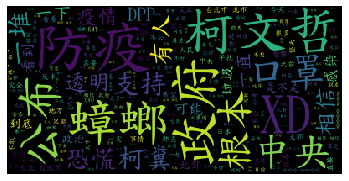

In [69]:
font = r'C:\Windows\Fonts\kaiu.ttf'
my_wordcloud = WordCloud(font_path=font).generate(" ".join(jiebaList))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [91]:
df = pd.DataFrame(jiebaList,columns=['data'])
df['count'] = 1
freq = df.groupby('data')['count'].sum().sort_values(ascending=False)
freq = pd.DataFrame(freq)
print(freq.head())

      count
data       
沒      2650
柯      2575
會      2384
說      2272
國      2270


In [15]:
with open ('nameDict.txt','w+') as f:
    f.write(json.dumps(nameDict,ensure_ascii=False))
# print(nameDict)

NameError: name 'fileControl' is not defined